##Scikit learn portfolio

Understand What scikit learn is
Load build in dataset
Split data innto traning & testing sets

In [3]:
! pip install scikit-learn

## Import required libraries

In [4]:
from sklearn.datasets import load_wine # Load the dataset
from sklearn.model_selection import train_test_split # train_test_split the dataset
import pandas as pd # Pandas data frame

## Load the dataset

In [5]:
wine = load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


##Convert to DataFrame for better view

In [6]:
D = pd.DataFrame(wine.data, columns= wine.feature_names) # DataFrame
D['frame'] = wine.frame
D.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,frame
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,None
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,None
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,None
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,None
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,None


##Split data into train/test

#Summary
concept
load wine(), build in Malic acid,dataset
train_test_split

x features
y label

In [7]:
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1) # 80/20 split
print(len(y_train))  # 120
print(len(x_test))   # 30

142
36


# Logistic regression , Decision tree and KNN classification

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Import Gridsearchcv, cross_val_score
from sklearn.linear_model import LogisticRegression          # logisticsRegression
from sklearn.tree import DecisionTreeClassifier        # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier      #Knn
from sklearn.metrics import accuracy_score      # accuracy
from sklearn.tree import plot_tree      #Plot tree
import matplotlib.pyplot as plt        #Import matplotlib for visualization
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import numpy as np            # import numpy library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns # Import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load and split the data

In [9]:
load = load_wine() # Load the data

x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42) # Test with 20% accuracy

##Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.971830985915493


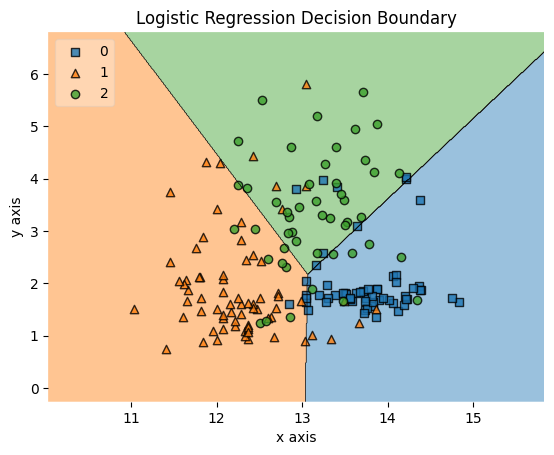

In [10]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_train)
print("Logistic Regression Accuracy:", accuracy_score(y_train, log_pred))

#Only two feture for ploting
x = wine.data[:,:2]   # Only 2 features
y = wine.target


model = LogisticRegression(max_iter=200)
model.fit(x, y)

# Plot decision regions
plot_decision_regions(x, y, clf=model, legend=2)
plt.xlabel('x axis') # X axis
plt.ylabel('y axis') # y axis
plt.title('Logistic Regression Decision Boundary')
plt.show()

## Decision tree

Accuracy score: 0.9444444444444444


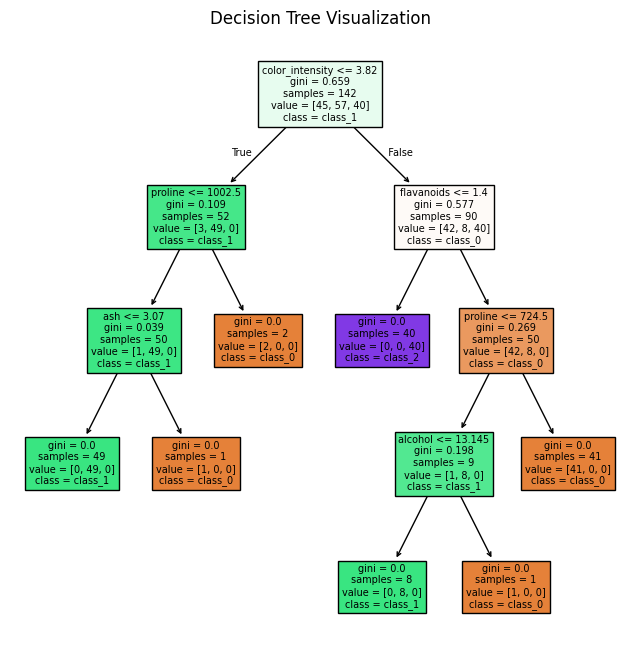

In [11]:
#Train decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# predicted using decision tree
tree_pred = tree_model.predict(x_test)

#Accuracy
print("Accuracy score:",accuracy_score(y_test, tree_pred))

# Plot the decision tree

plt.figure(figsize=(8,8))
plot_tree(tree_model, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.title("Decision Tree Visualization")
plt.show()


# K nearest neighbours


KNN Accuracy: 0.9722222222222222


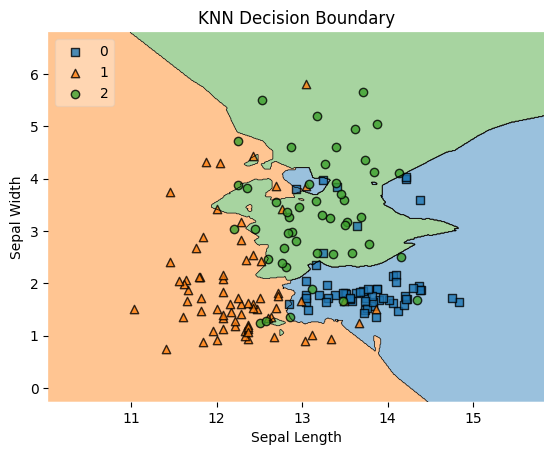

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = log_model.predict(x_test) # x_test for feauture test
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

# Use 2 features only
x = wine.data[:, :2]
y = wine.target

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)


plot_decision_regions(x, y, clf=knn, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundary')
plt.show()


## Model Evoluation

In [13]:
# Load the data

wine = load_wine()
x = wine.data
y = wine.target
# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=  0.2, random_state = 42)
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)

Confusion matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
cr = classification_report(y_test, y_pred, target_names=wine.target_names)
print("Classification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



# Confusion matrix visualization

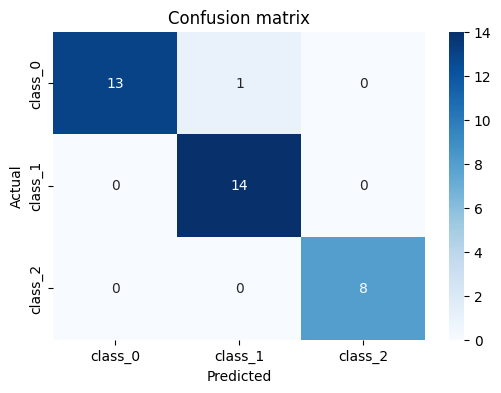

In [20]:
plt.figure(figsize=(6, 4)) # Weight and hight
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',xticklabels=wine.target_names,yticklabels=wine.target_names)
plt.xlabel("Predicted") # x label
plt.ylabel("Actual") # y label
plt.title("Confusion matrix") # confusion matrix
plt.show() # Visualization

#Unsupervised learning

KMeans Clustering + PCA


Kmeans clustering

In [21]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(x)
clusters = kmeans.labels_
D['cluster'] = clusters

print("Predicted clusters:",clusters[:10])
print("Real labels",y[:10])

Predicted clusters: [1 1 2 2 1 2 2 2 1 1]
Real labels [0 0 0 0 0 0 0 0 0 0]


##Reduce to 2D using PCA fro visualization

In [22]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
D['Pca1'] = x_pca[:, 0]
D['Pca2'] = x_pca[:, 1]

## Plot KMeans clusters

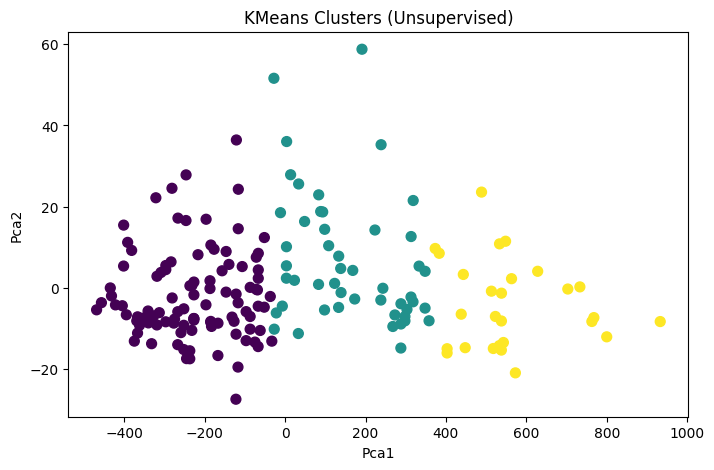

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(D['Pca1'], D['Pca2'], c=D['cluster'], cmap='viridis', s=50)
plt.title("KMeans Clusters (Unsupervised)")
plt.xlabel("Pca1")
plt.ylabel("Pca2")
plt.show()

## Compare to real label

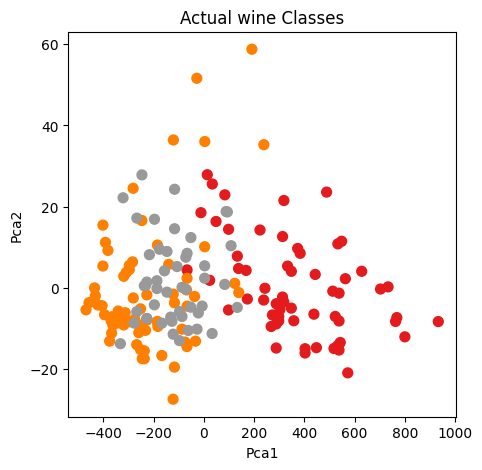

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(D['Pca1'], D['Pca2'], c=y, cmap='Set1', s=50)
plt.title("Actual wine Classes")
plt.xlabel("Pca1")
plt.ylabel("Pca2")
plt.show()


# Grid search cv and cross validation
Load and split the data

In [25]:
wine = load_wine()
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tune model using Grid search cv

Best K: {'n_neighbors': np.int64(17)}
Best Score: 0.7253694581280788


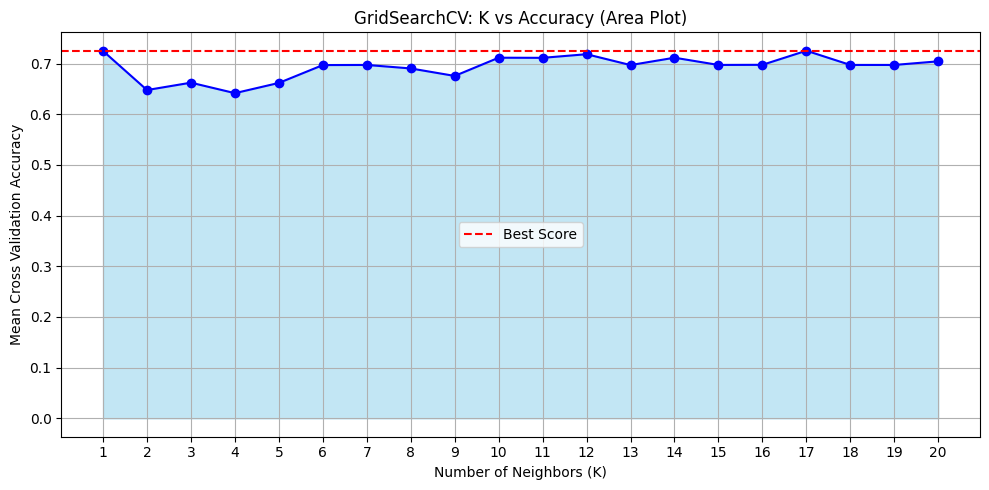

In [30]:
import matplotlib.pyplot as plt # Import library


param_grid = {'n_neighbors': np.arange(1, 21) }
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5)  # 5 fold cross validation
grid.fit(x_train, y_train)
# Extracting for visualization
params = grid.cv_results_['param_n_neighbors'].tolist()
mean_scores = grid.cv_results_['mean_test_score']
print("Best K:", grid.best_params_)
print("Best Score:", grid.best_score_)
# Additional visualization - Area Plot for GridSearchCV results
plt.figure(figsize=(10, 5))
plt.fill_between(params, mean_scores, color='skyblue', alpha=0.5)
plt.plot(params, mean_scores, color='blue', marker='o')
plt.axhline(y=max(mean_scores), color='red', linestyle='--', label='Best Score')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Cross Validation Accuracy")
plt.title("GridSearchCV: K vs Accuracy (Area Plot)")
plt.xticks(params)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Out put

Average sucess rate 72.5%

# Final accuracy with best model

Test Accuracy with best K: 0.7777777777777778


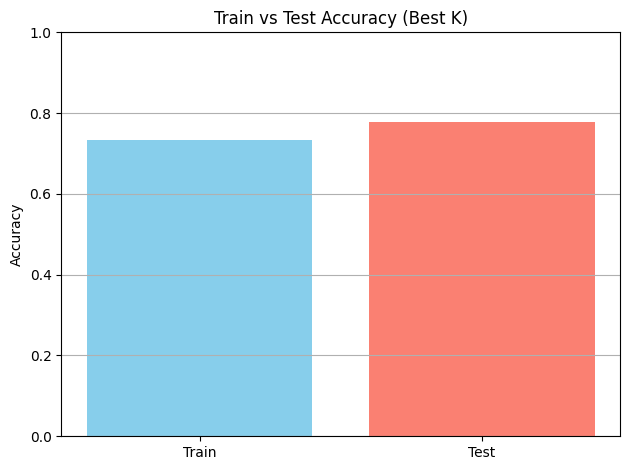

In [36]:
best_knn = grid.best_estimator_
accuracy = best_knn.score(x_test, y_test)
print("Test Accuracy with best K:", accuracy)
train_accuracy = best_knn.score(x_train, y_train)

# Compare bar chart
plt.bar(["Train", "Test"], [train_accuracy, accuracy], color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy (Best K)")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Test accuracy
out put = 77.8%

# Cross validation manually

Cross-validation scores:
 [0.63888889 0.69444444 0.66666667 0.65714286 0.85714286]
Mean Accuracy:
 0.7028571428571428


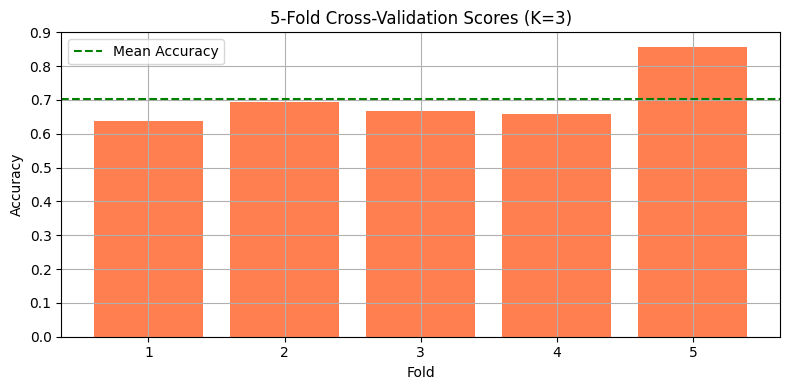

In [44]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, cv=5)
print("Cross-validation scores:\n", scores)
print("Mean Accuracy:\n", scores.mean())


# Bar chart visualization

plt.figure(figsize=(8, 4))
plt.bar(range(1, 6), scores, color='coral')
plt.axhline(y=np.mean(scores), color='green', linestyle='--', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation Scores (K=3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
